# OBJECTIVE
1.what is the overall sales trend? 2.What are the top 10 category of products by sales? 3. Which is the most preferred ship mode? 

Importing libraries


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the CSV file

In [13]:
df = pd.read_csv("E:/datset/AutoPartSalesNew.csv")


Initial Data exploration and Descriptive analysis

In [14]:
df.head()

,order_id,order_date,ship_mode,customer_name,segment,state,country,category,product_id,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,ID-2013-37383,2022-01-01 0:00,First Class,Muhammed Yedwab,Corporate,Ontario,Canada,wiper blades,TEC-CO-10002379,bosch Icon series 121,1649.214,7,0.1,36.624,178.71,Medium,2022
1,IN-2013-47960,2022-01-01 0:00,Standard Class,Joe Elijah,Consumer,Ontario,Canada,wiper blades,FUR-BO-10003549,bosch Icon series 122,1358.280,7,0.0,203.700,155.15,Medium,2022
2,ID-2013-37383,2022-01-01 0:00,First Class,Muhammed Yedwab,Corporate,Ontario,Canada,wiper blades,TEC-AC-10001500,bosch Icon series 123,728.568,8,0.1,-32.472,143.97,Medium,2022
3,IN-2013-47960,2022-01-01 0:00,Standard Class,Joe Elijah,Consumer,Ontario,Canada,wiper blades,FUR-BO-10004541,bosch Icon series 124,2189.520,6,0.0,372.060,102.05,Medium,2022
4,IN-2013-47960,2022-01-01 0:00,Standard Class,Joe Elijah,Consumer,Ontario,Canada,wiper blades,FUR-BO-10003661,bosch Icon series 125,1362.060,7,0.0,340.410,90.86,Medium,2022


In [15]:
df.shape

(13799, 17)

In [16]:
df.columns

Index(['order_id', 'order_date', 'ship_mode', 'customer_name', 'segment',
       'state', 'country', 'category', 'product_id', 'product_name', 'sales',
       'quantity', 'discount', 'profit', 'shipping_cost', 'order_priority',
       'year'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13799 entries, 0 to 13798
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        13799 non-null  object 
 1   order_date      13799 non-null  object 
 2   ship_mode       13799 non-null  object 
 3   customer_name   13799 non-null  object 
 4   segment         13799 non-null  object 
 5   state           13799 non-null  object 
 6   country         13799 non-null  object 
 7   category        13799 non-null  object 
 8   product_id      13799 non-null  object 
 9   product_name    13799 non-null  object 
 10  sales           13799 non-null  float64
 11  quantity        13799 non-null  int64  
 12  discount        13799 non-null  float64
 13  profit          13799 non-null  float64
 14  shipping_cost   13799 non-null  float64
 15  order_priority  13799 non-null  object 
 16  year            13799 non-null  int64  
dtypes: float64(4), int64(2), object

In [18]:
df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,13799.000000,13799.000000,13799.000000,13799.000000,13799.000000,13799.0
mean,246.811106,3.488369,0.140265,29.604519,26.418490,2022.0
std,494.719419,2.280165,0.210051,190.643662,57.082203,0.0
min,0.836000,1.000000,0.000000,-6599.978000,0.010000,2022.0
25%,30.816000,2.000000,0.000000,0.000000,2.620000,2022.0
50%,85.232000,3.000000,0.000000,9.240000,7.830000,2022.0
75%,249.720000,5.000000,0.200000,36.872000,24.964500,2022.0
max,17499.950000,14.000000,0.800000,8399.976000,923.630000,2022.0


Checking for duplicates considering order_id as the primary key

In [22]:
df.duplicated(subset = 'order_id')

0        False
1        False
2         True
3         True
4         True
         ...  
13794     True
13795    False
13796     True
13797     True
13798    False
Length: 13799, dtype: bool

Found duplicates and used top to bottom approach to treat duplicates

In [23]:
df.drop_duplicates(subset = 'order_id',keep = 'first',inplace = True)

In [25]:
df.shape

(6721, 17)

 remaining obervations after deletion of duplicates

Checking for null values

In [26]:
df.isnull().any()

order_id          False
order_date        False
ship_mode         False
customer_name     False
segment           False
state             False
country           False
category          False
product_id        False
product_name      False
sales             False
quantity          False
discount          False
profit            False
shipping_cost     False
order_priority    False
year              False
dtype: bool

In [27]:
df.isnull().sum()

order_id          0
order_date        0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
category          0
product_id        0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

No null values found

# EXPLORATORY DATA ANALYSIS
What is the overall sales trend?

In [29]:
df['order_date'].min()

'2022-01-01 0:00'

In [30]:
df['order_date'].max()

'2022-12-31 0:00'

In [33]:
type(df['order_date'][0])

str

In [34]:
from datetime import datetime

In [36]:
datetime.strptime(df['order_date'][0], '%Y-%m-%d %H:%M').strftime('%m/%d/%Y')

'01/01/2022'

convert date str object to datetime object

In [37]:
df['order_date'] = df['order_date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M').strftime('%m/%d/%Y'))

In [38]:
type(df['order_date'][0])

str

In [40]:
df['order_date'][0]

'01/01/2022'

In [41]:
df['order_date'].max()

'12/31/2022'

creating a new column for month and year

In [45]:
df['month_year'] = df['order_date'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y').strftime('%Y-%m'))

In [46]:
df['month_year']

0        2022-01
1        2022-01
5        2022-01
6        2022-01
7        2022-01
          ...   
13784    2022-12
13790    2022-12
13791    2022-12
13795    2022-12
13798    2022-12
Name: month_year, Length: 6721, dtype: object

grouping by month year to get the sales trends

In [52]:
df_trend = df.groupby('month_year').sum()['sales'].reset_index()

In [53]:
df_trend

,month_year,sales
0,2022-01,154290.85594
1,2022-02,130483.27412
2,2022-03,155796.36694
3,2022-04,137510.01956
4,2022-05,195412.71292
5,2022-06,298638.66508
6,2022-07,167893.77284
7,2022-08,237115.38176
8,2022-09,272998.79280
9,2022-10,228186.41776


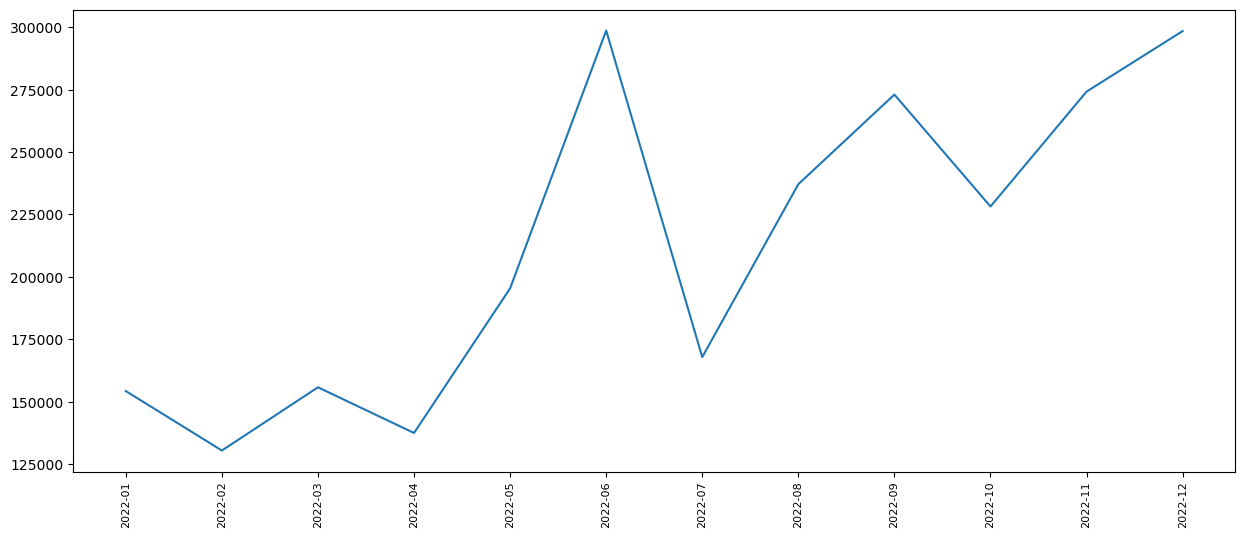

In [58]:
# plotting
plt.figure(figsize =(15,6))
plt.plot(df_trend['month_year'],df_trend['sales'])
plt.xticks(rotation = 'vertical',size = 8)
plt.show()

In [59]:
# The sales are lower but sales are increasing very well

Which are the Top selling category of products by sales ?

In [61]:
df.columns

Index(['order_id', 'order_date', 'ship_mode', 'customer_name', 'segment',
       'state', 'country', 'category', 'product_id', 'product_name', 'sales',
       'quantity', 'discount', 'profit', 'shipping_cost', 'order_priority',
       'year', 'month_year'],
      dtype='object')

In [64]:
prod_sales = pd.DataFrame(df.groupby('category').sum()['sales'])

In [67]:
prod_sales

,sales
category,
A/C and cooling,37208.64948
auto body parts,902346.36978
emission and exhaust,26175.29960
engine and ignition,57740.23864
fuel delivery,151904.18620
headlights bulb,18139.03880
heating engine,30844.85828
performance parts,124874.41678
starters and alternators,290962.65606


In [68]:
prod_sales =prod_sales.sort_values('sales',ascending = False)

In [70]:
# top 10 
prod_10 = prod_sales.head(10)

In [71]:
prod_10

,sales
category,
auto body parts,902346.36978
suspension parts,616667.65566
starters and alternators,290962.65606
transmission,179955.08516
fuel delivery,151904.18620
performance parts,124874.41678
wiper blades,106215.45914
engine and ignition,57740.23864
A/C and cooling,37208.64948


In [75]:
df_prod = df.groupby('category').sum()['sales'].reset_index()

In [79]:
df_prod = df_prod.sort_values('sales',ascending = False)

In [82]:
df_top10 = df_prod.head(10)

In [83]:
df_top10

,category,sales
1,auto body parts,902346.36978
10,suspension parts,616667.65566
8,starters and alternators,290962.65606
11,transmission,179955.08516
4,fuel delivery,151904.18620
7,performance parts,124874.41678
12,wiper blades,106215.45914
3,engine and ignition,57740.23864
0,A/C and cooling,37208.64948
6,heating engine,30844.85828


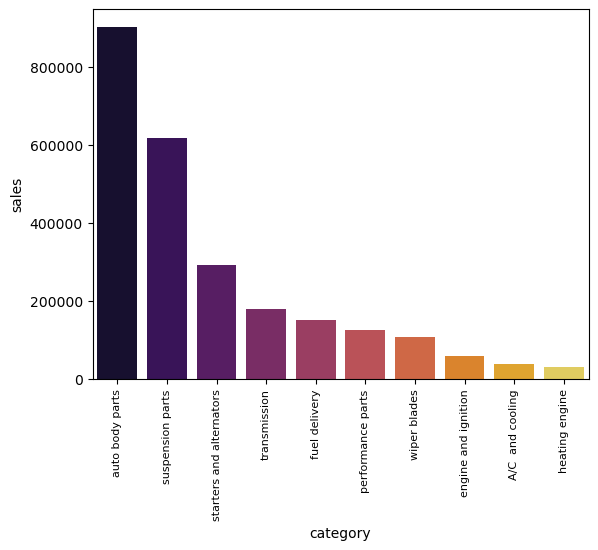

In [88]:
sns.barplot(x = 'category', y = 'sales',data = df_top10,palette = 'inferno')
plt.xticks(rotation = 'vertical',size = 8)
plt.show()

what is the most preferred ship mode?

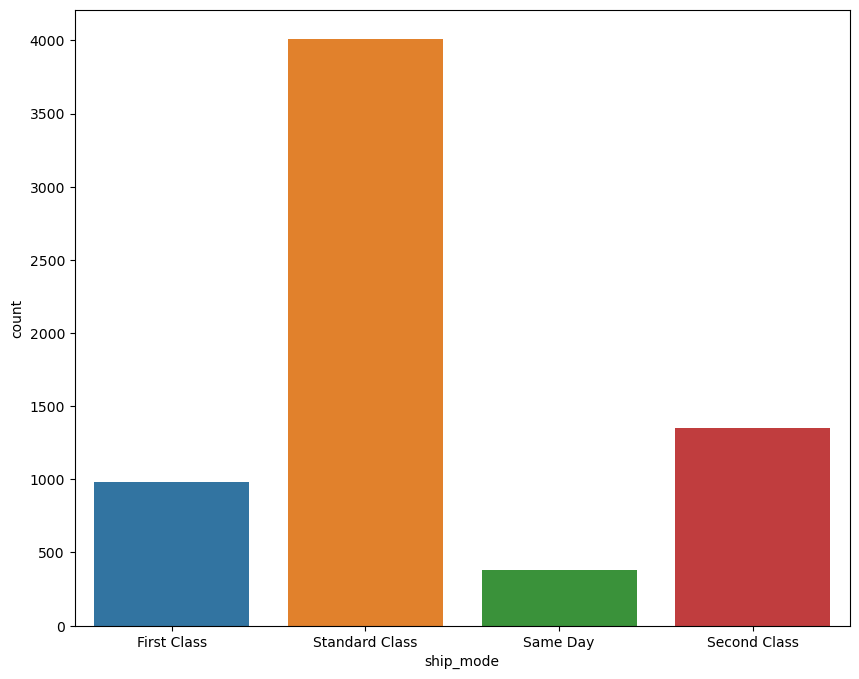

In [89]:
plt.figure(figsize = (10,8))
sns.countplot(x = 'ship_mode',data = df)
plt.show()

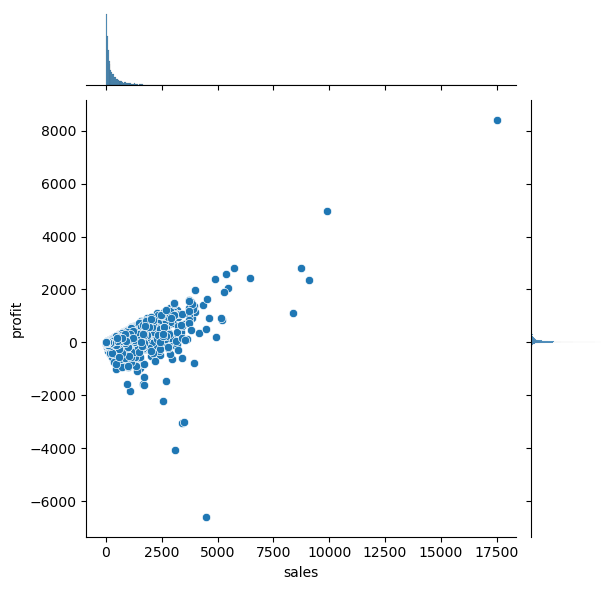

In [95]:
sns.jointplot(x ='sales',y = 'profit',data = df)

Which are most sold categories?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'wiper blades'),
  Text(1, 0, 'headlights bulb'),
  Text(2, 0, 'engine and ignition'),
  Text(3, 0, 'heating engine'),
  Text(4, 0, 'A/C  and cooling'),
  Text(5, 0, 'performance parts'),
  Text(6, 0, 'emission and exhaust'),
  Text(7, 0, 'fuel delivery'),
  Text(8, 0, 'starters and alternators'),
  Text(9, 0, 'suspension parts'),
  Text(10, 0, 'auto body parts'),
  Text(11, 0, 'transmission'),
  Text(12, 0, 'steering and alignment')])

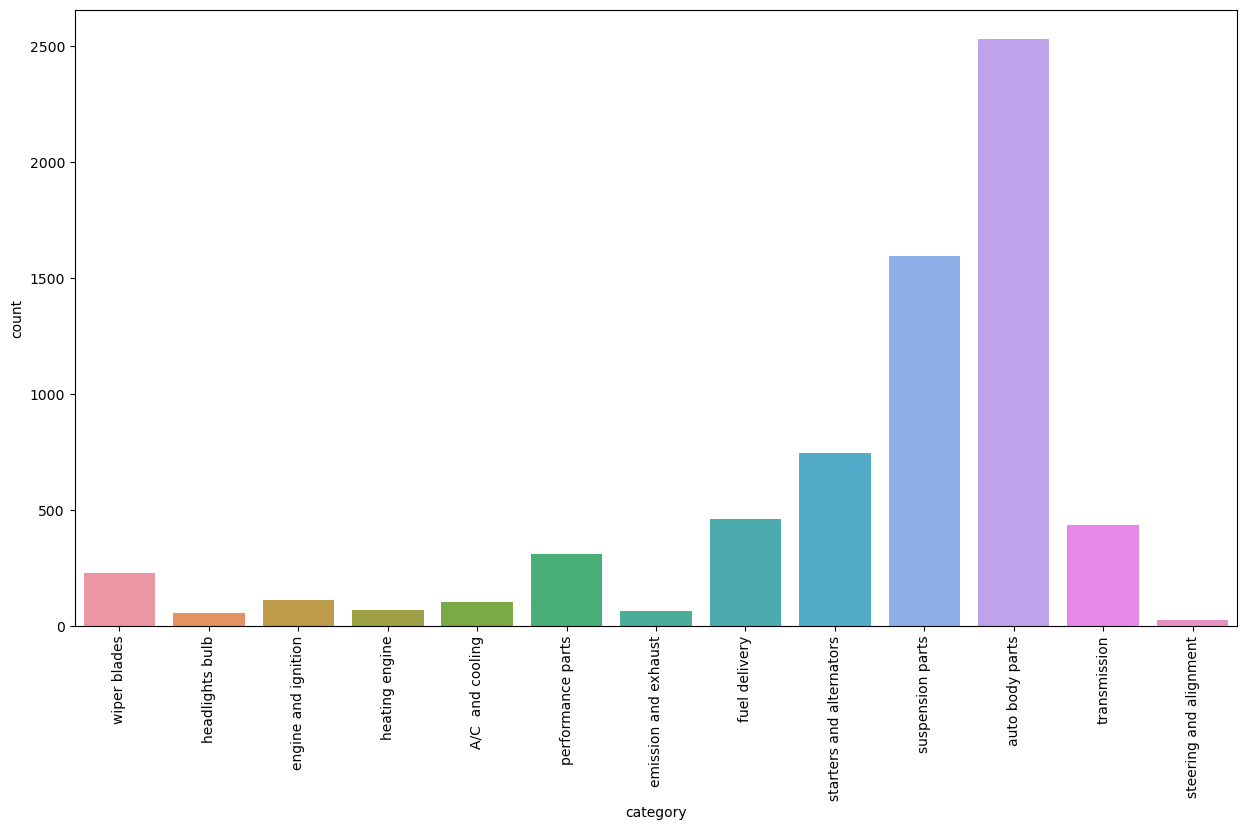

In [104]:
plt.figure(figsize = (15,8))
sns.countplot(x = 'category',data = df)
plt.xticks(rotation = 90)

<AxesSubplot:xlabel='category', ylabel='profit'>

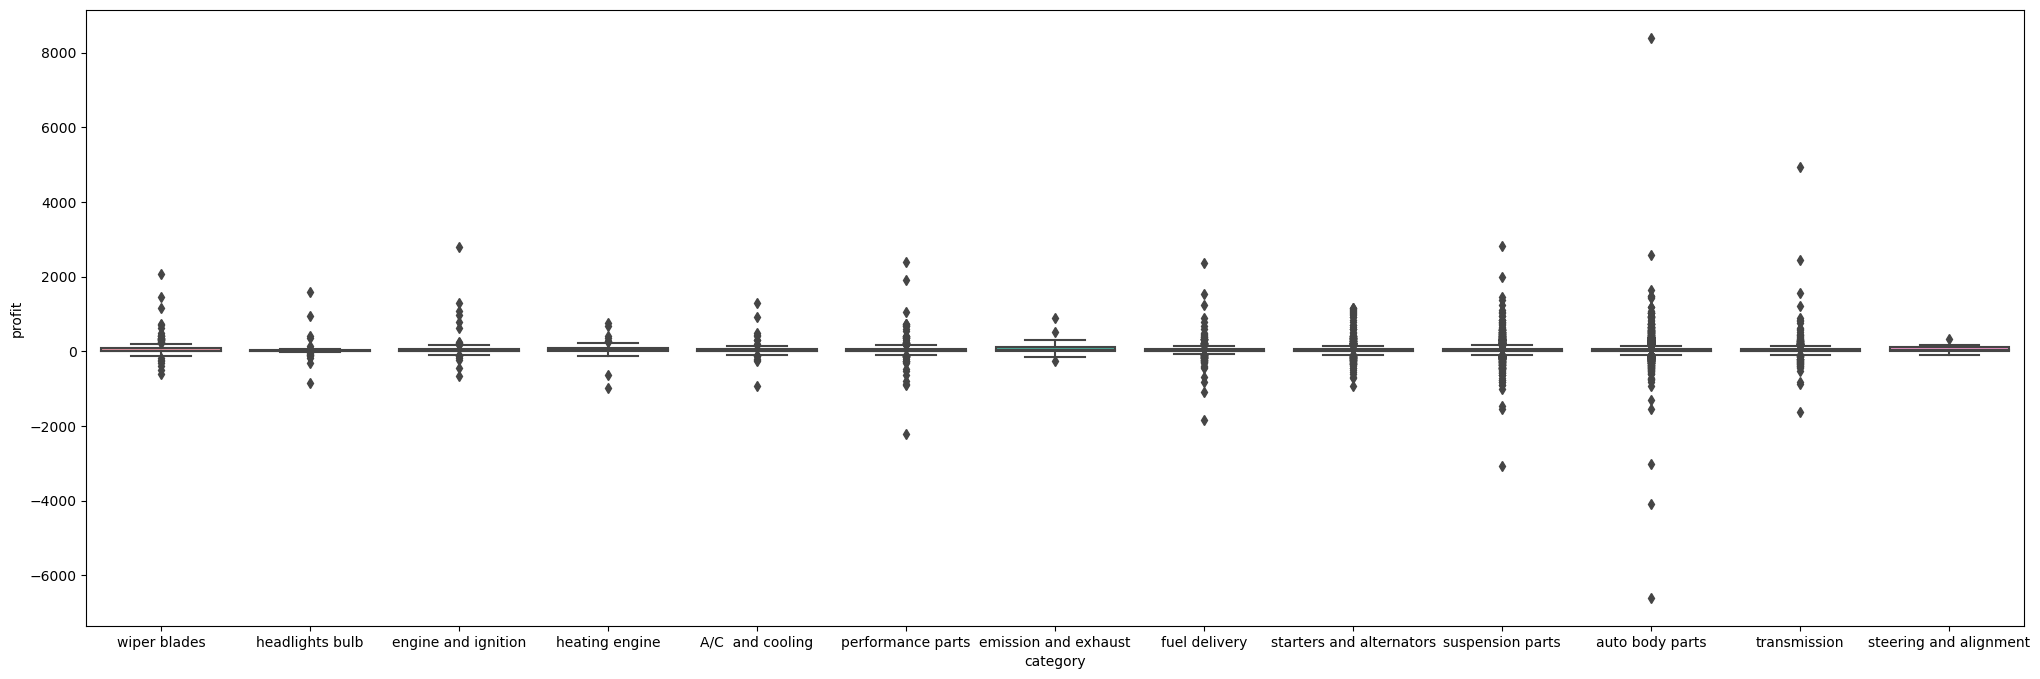

In [108]:
plt.figure(figsize = (25,8))
sns.boxplot( x = 'category', y = 'profit',data = df)